In [1]:
import numpy as np
import pymc3 as pm
import matplotlib.pyplot as plt

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
<frozen importlib._bootstrap>:228: RuntimeWarning: numpy.ndarray size changed, may indicate binary incompatibility. Expected 16 from C header, got 88 from PyObject


In [2]:
np.random.seed(0)
X=np.linspace(0,10,100)
true_slope=2.0
true_intercept=5.0
y=true_slope*X + true_intercept+ np.random.normal(scale=2.0,size=len(X))

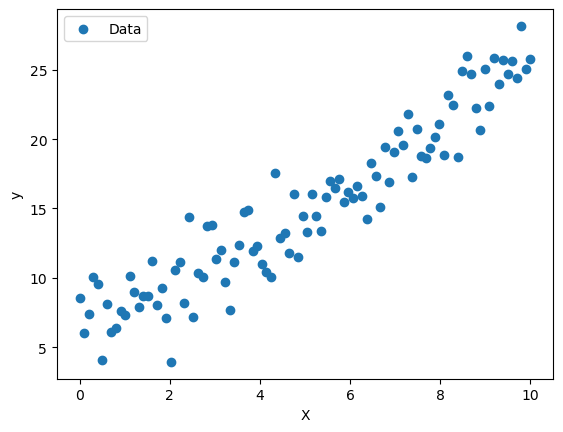

In [3]:
plt.scatter(X,y,label='Data')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()


In [5]:
with pm.model() as model:
    slope=pm.Normal('slope',mu=0,sd=10)
    intercept=pm.Normal('intercept', mu=0,sd=0)

    y_pred=slope*X+intercept

    likelihood=pm.Normal('y',mu=y_pred,sd=2.0, observed=y)

TypeError: 'module' object is not callable